# Part 1: Importing Data and Libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

I chose to use the Student Performance Dataset (specifically the portion of the dataset looking at the students' math grades).

In [62]:
url = 'student-mat.csv'
df = pd.read_csv(url,delimiter = ';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Part 2: Exploratory Data Analysis (EDA)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [64]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [65]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

First, I decided to look at the distribution of students' final grades.

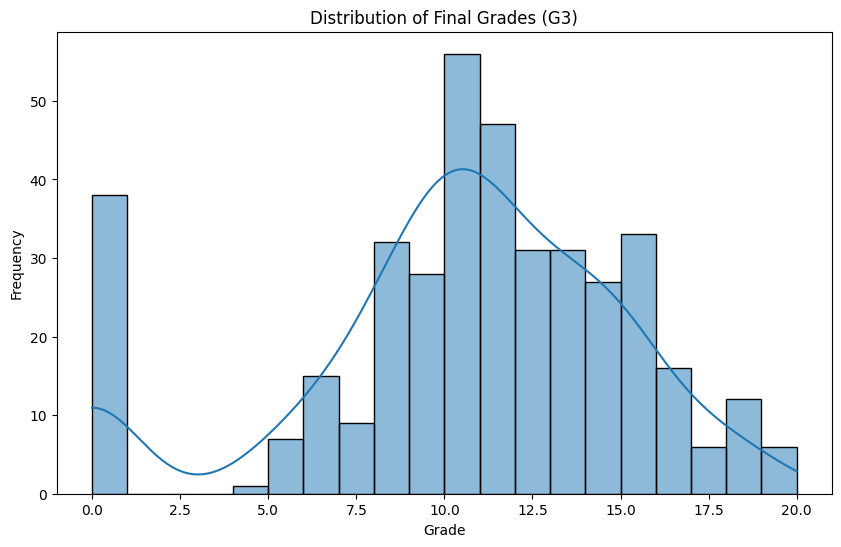

In [66]:
plt.figure(figsize=(10, 6))
sns.histplot(df['G3'], bins=20, kde=True)
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.show()

Next, I decided to look at the distribution of these final grades separated by the study time of the students.

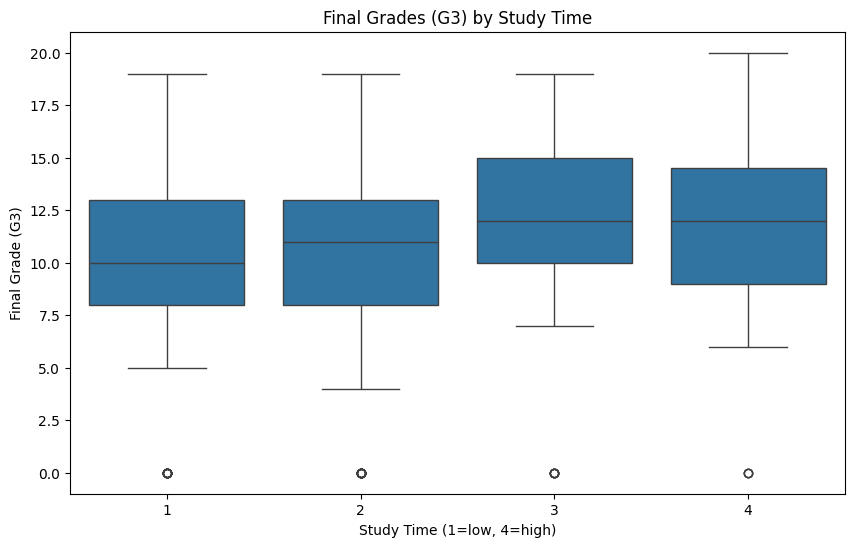

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='studytime', y='G3', data=df)
plt.title("Final Grades (G3) by Study Time")
plt.xlabel("Study Time (1=low, 4=high)")
plt.ylabel("Final Grade (G3)")
plt.show()

Finally, I decided to look at the number of absences in relation to the students' final grades.

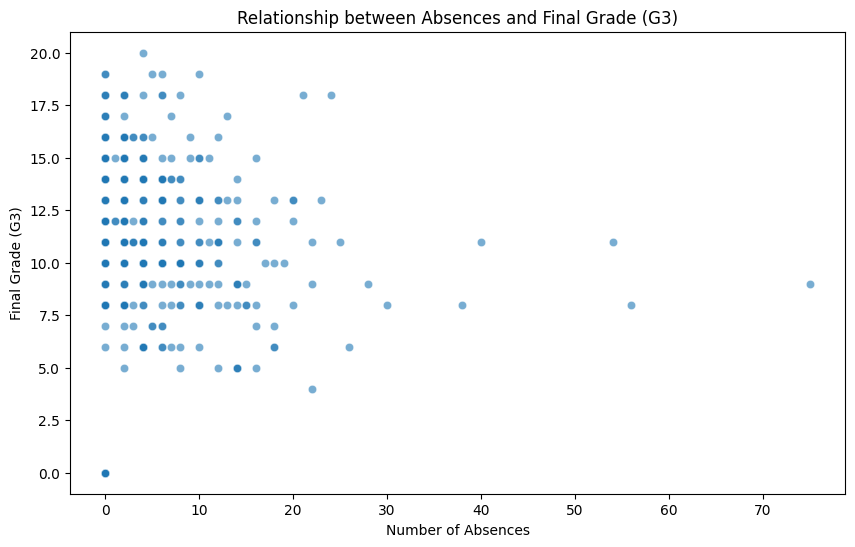

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='absences', y='G3', data=df, alpha=0.6)

plt.title("Relationship between Absences and Final Grade (G3)")
plt.xlabel("Number of Absences")
plt.ylabel("Final Grade (G3)")
plt.show()

# Part 3: Hypothesis Formulation

__Hypothesis 1:__ Students who study for longer times have higher final grades.

__Hypothesis 2:__ Students who miss more classes will receive lower final grades.

# Part 4: Hypothesis Testing

### Hypothesis 1:
I chose to use pearson correlation test between study time and final grade in order to see if there was any correlation between the two.

In [69]:
corr, p_val = pearsonr(df['studytime'], df['G3'])
print("Correlation between Study Time and Final Grades:")
print(f"Pearson correlation = {corr}, p-value = {p_val}")
if p_val < 0.05:
    print("Result: Significant correlation between study time and final grades.")
else:
    print("Result: No significant correlation between study time and final grades.")

Correlation between Study Time and Final Grades:
Pearson correlation = 0.09781968965319629, p-value = 0.05206115462062921
Result: No significant correlation between study time and final grades.


Since the p-value was greater than 0.05, the test shows that there is no _significant_ correlation between study time and final grades. This disproves our first hypothesis.

### Hypothesis 2:
I also chose to conduct a pearson correlation test on the final grade and number of absences, to see if missing school has a significant impact on the student's performance.

In [70]:
# Pearson correlation for absences and final grades
corr, p_val = pearsonr(df['absences'], df['G3'])
print("Correlation between Absences and Final Grades:")
print(f"Pearson correlation = {corr}, p-value = {p_val}")

if p_val < 0.05:
    print("Result: Significant negative correlation between absences and final grades.")
else:
    print("Result: No significant correlation between absences and final grades.")


Correlation between Absences and Final Grades:
Pearson correlation = 0.034247316150069325, p-value = 0.4973317955435271
Result: No significant correlation between absences and final grades.


Since the p-value was significantly higher than 0.05, we can say that there was no significant correlation between absences and final grades. This disproves our second hypothesis

# Part 5: Conclusion

As shown above, neither hypothesis was supported by this dataset. While this may seem counterintuitive, it can provide helpful insights for students who fixate on these issues. Many students face unfortunate circumstances outside of their control that cause them to miss days of school or not study as much as they should for exams. While students shouldn't start skipping all their classes or stop studying altogether, these findings can reassure them that their academic lives won’t derail due to factors beyond their control.